In [1]:
# Import relevant libraries.
import numpy as np
import numpy.linalg
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.graphics.factorplots import interaction_plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import pearsonr
from scipy import stats
# Import the PCA function
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Import data set from Excel file as a Pandas DataFrame object.
# df = pd.read_excel('Credit.xlsx')
filename = "MS9004_Assignment_2122s2.csv"
df = pd.read_csv(filename)
print(df)
print(df.shape)

             Y        X1        X2        X3        X4        X5        X6  \
0     1.464291  0.147004  0.541170  0.182354  0.400464  0.738181  1.980026   
1     1.781572  0.146102  0.537532  0.202159  0.526507  0.839562  2.134343   
2     1.425711  0.149849  0.490378  0.174367  0.590303  0.850151  2.118882   
3     1.565796  0.144120  0.587164  0.199001  0.733511  1.300077  2.108993   
4     1.054776  0.134505  0.375166  0.128599  0.727178  0.679020  1.978149   
...        ...       ...       ...       ...       ...       ...       ...   
1072  1.646627  0.140528  0.472118  0.164800  0.680359  0.723301  2.221932   
1073  1.184260  0.141690  0.411090  0.171222  0.347869  0.666824  2.229500   
1074  1.603484  0.164838  0.539241  0.182344  0.827651  0.844376  2.430857   
1075  0.971589  0.117226  0.374955  0.119494  0.596916  0.471171  1.321953   
1076  1.437343  0.152001  0.600355  0.179621  0.500929  0.787907  2.052253   

            X7        X8        X9       X10 Genotype  Treatmen

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior
0,1.464291,0.147004,0.541170,0.182354,0.400464,0.738181,1.980026,0.371605,0.209784,0.235137,0.755044,Ts65Dn,Saline,S/C
1,1.781572,0.146102,0.537532,0.202159,0.526507,0.839562,2.134343,0.482603,0.544662,0.515372,1.369644,Control,Memantine,C/S
2,1.425711,0.149849,0.490378,0.174367,0.590303,0.850151,2.118882,0.463417,0.613554,0.563807,1.571738,Control,Memantine,C/S
3,1.565796,0.144120,0.587164,0.199001,0.733511,1.300077,2.108993,0.328440,0.713298,0.888564,1.993218,Ts65Dn,Memantine,C/S
4,1.054776,0.134505,0.375166,0.128599,0.727178,0.679020,1.978149,0.431567,2.088832,2.201831,4.942604,Control,Saline,C/S


In [4]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior
1072,1.646627,0.140528,0.472118,0.164800,0.680359,0.723301,2.221932,0.459547,0.271043,0.324592,1.244453,Ts65Dn,Saline,S/C
1073,1.184260,0.141690,0.411090,0.171222,0.347869,0.666824,2.229500,0.400094,0.373307,0.418401,1.187314,Ts65Dn,Memantine,C/S
1074,1.603484,0.164838,0.539241,0.182344,0.827651,0.844376,2.430857,0.441829,0.419732,0.508725,1.430067,Control,Memantine,C/S
1075,0.971589,0.117226,0.374955,0.119494,0.596916,0.471171,1.321953,0.277665,0.317181,0.373648,1.020024,Control,Memantine,C/S
1076,1.437343,0.152001,0.600355,0.179621,0.500929,0.787907,2.052253,0.394140,0.216144,0.252390,0.848115,Ts65Dn,Saline,S/C


In [5]:
df.dtypes

Y            float64
X1           float64
X2           float64
X3           float64
X4           float64
X5           float64
X6           float64
X7           float64
X8           float64
X9           float64
X10          float64
Genotype      object
Treatment     object
Behavior      object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1077 non-null   float64
 1   X1         1077 non-null   float64
 2   X2         1077 non-null   float64
 3   X3         1077 non-null   float64
 4   X4         1077 non-null   float64
 5   X5         1077 non-null   float64
 6   X6         1077 non-null   float64
 7   X7         1077 non-null   float64
 8   X8         1077 non-null   float64
 9   X9         1077 non-null   float64
 10  X10        1077 non-null   float64
 11  Genotype   1077 non-null   object 
 12  Treatment  1077 non-null   object 
 13  Behavior   1077 non-null   object 
dtypes: float64(11), object(3)
memory usage: 117.9+ KB


In [7]:
# By default, df.describe() will only give descriptive statistics of quantitative data.
# If you want to include all data including qualitative, type: df.describe(include='all')
df.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,1.548413,0.156468,0.527347,0.181305,0.726933,0.942935,2.235409,0.446149,0.378519,0.425810,1.428682
std,0.248458,0.015089,0.082167,0.024950,0.188013,0.173039,0.254723,0.066507,0.216388,0.249362,0.466904
min,0.853176,0.100217,0.284001,0.099734,0.281285,0.344120,1.206098,0.258626,0.143894,0.145327,0.429032
25%,1.374922,0.146950,0.475480,0.166312,0.590303,0.826708,2.079042,0.398036,0.264334,0.288121,1.203665
50%,1.522698,0.156359,0.526676,0.182681,0.719591,0.930796,2.243043,0.448585,0.326658,0.366378,1.355846
75%,1.713334,0.165435,0.576994,0.198584,0.848640,1.045177,2.420306,0.490805,0.413561,0.487711,1.561316
max,2.586216,0.208698,0.889735,0.260739,1.412750,1.679953,2.877873,0.759588,2.133416,2.516367,6.113347


In [8]:
# Top = mode
# Freq = no. of mode.
df.describe(include='all')

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077,1077,1077
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control,Memantine,S/C
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570,570,552
mean,1.548413,0.156468,0.527347,0.181305,0.726933,0.942935,2.235409,0.446149,0.378519,0.425810,1.428682,NaN,NaN,NaN
std,0.248458,0.015089,0.082167,0.024950,0.188013,0.173039,0.254723,0.066507,0.216388,0.249362,0.466904,NaN,NaN,NaN
min,0.853176,0.100217,0.284001,0.099734,0.281285,0.344120,1.206098,0.258626,0.143894,0.145327,0.429032,NaN,NaN,NaN
25%,1.374922,0.146950,0.475480,0.166312,0.590303,0.826708,2.079042,0.398036,0.264334,0.288121,1.203665,NaN,NaN,NaN
50%,1.522698,0.156359,0.526676,0.182681,0.719591,0.930796,2.243043,0.448585,0.326658,0.366378,1.355846,NaN,NaN,NaN
75%,1.713334,0.165435,0.576994,0.198584,0.848640,1.045177,2.420306,0.490805,0.413561,0.487711,1.561316,NaN,NaN,NaN


In [9]:
# Generate the correlations. 
df.corr()

# To get individual correlations:
# df.corr()['Age']['Breakdowns']
# df['Age'].corr(df['Breakdowns'])

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Y,1.000000,0.569754,0.548115,0.554999,0.502013,0.633568,0.547355,0.515466,-0.252940,-0.206133,-0.199529
X1,0.569754,1.000000,0.617941,0.522578,0.374987,0.410657,0.611854,0.540401,-0.231401,-0.233143,-0.159991
X2,0.548115,0.617941,1.000000,0.366691,0.208639,0.230605,0.506161,0.281466,-0.369572,-0.402207,-0.336116
X3,0.554999,0.522578,0.366691,1.000000,0.436017,0.575588,0.579089,0.349815,-0.140791,-0.088226,-0.093669
X4,0.502013,0.374987,0.208639,0.436017,1.000000,0.488721,0.421634,0.471350,-0.211780,-0.184921,0.018844
X5,0.633568,0.410657,0.230605,0.575588,0.488721,1.000000,0.488776,0.428885,0.046207,0.142495,0.139246
X6,0.547355,0.611854,0.506161,0.579089,0.421634,0.488776,1.000000,0.448797,-0.150219,-0.158898,-0.113414
X7,0.515466,0.540401,0.281466,0.349815,0.471350,0.428885,0.448797,1.000000,-0.055293,-0.047246,0.039426
X8,-0.252940,-0.231401,-0.369572,-0.140791,-0.211780,0.046207,-0.150219,-0.055293,1.000000,0.959578,0.804089
X9,-0.206133,-0.233143,-0.402207,-0.088226,-0.184921,0.142495,-0.158898,-0.047246,0.959578,1.000000,0.791173


<AxesSubplot:>

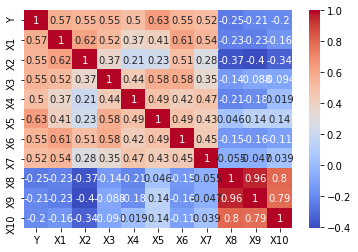

In [10]:
# Produce a heatmap from Seaborn library.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

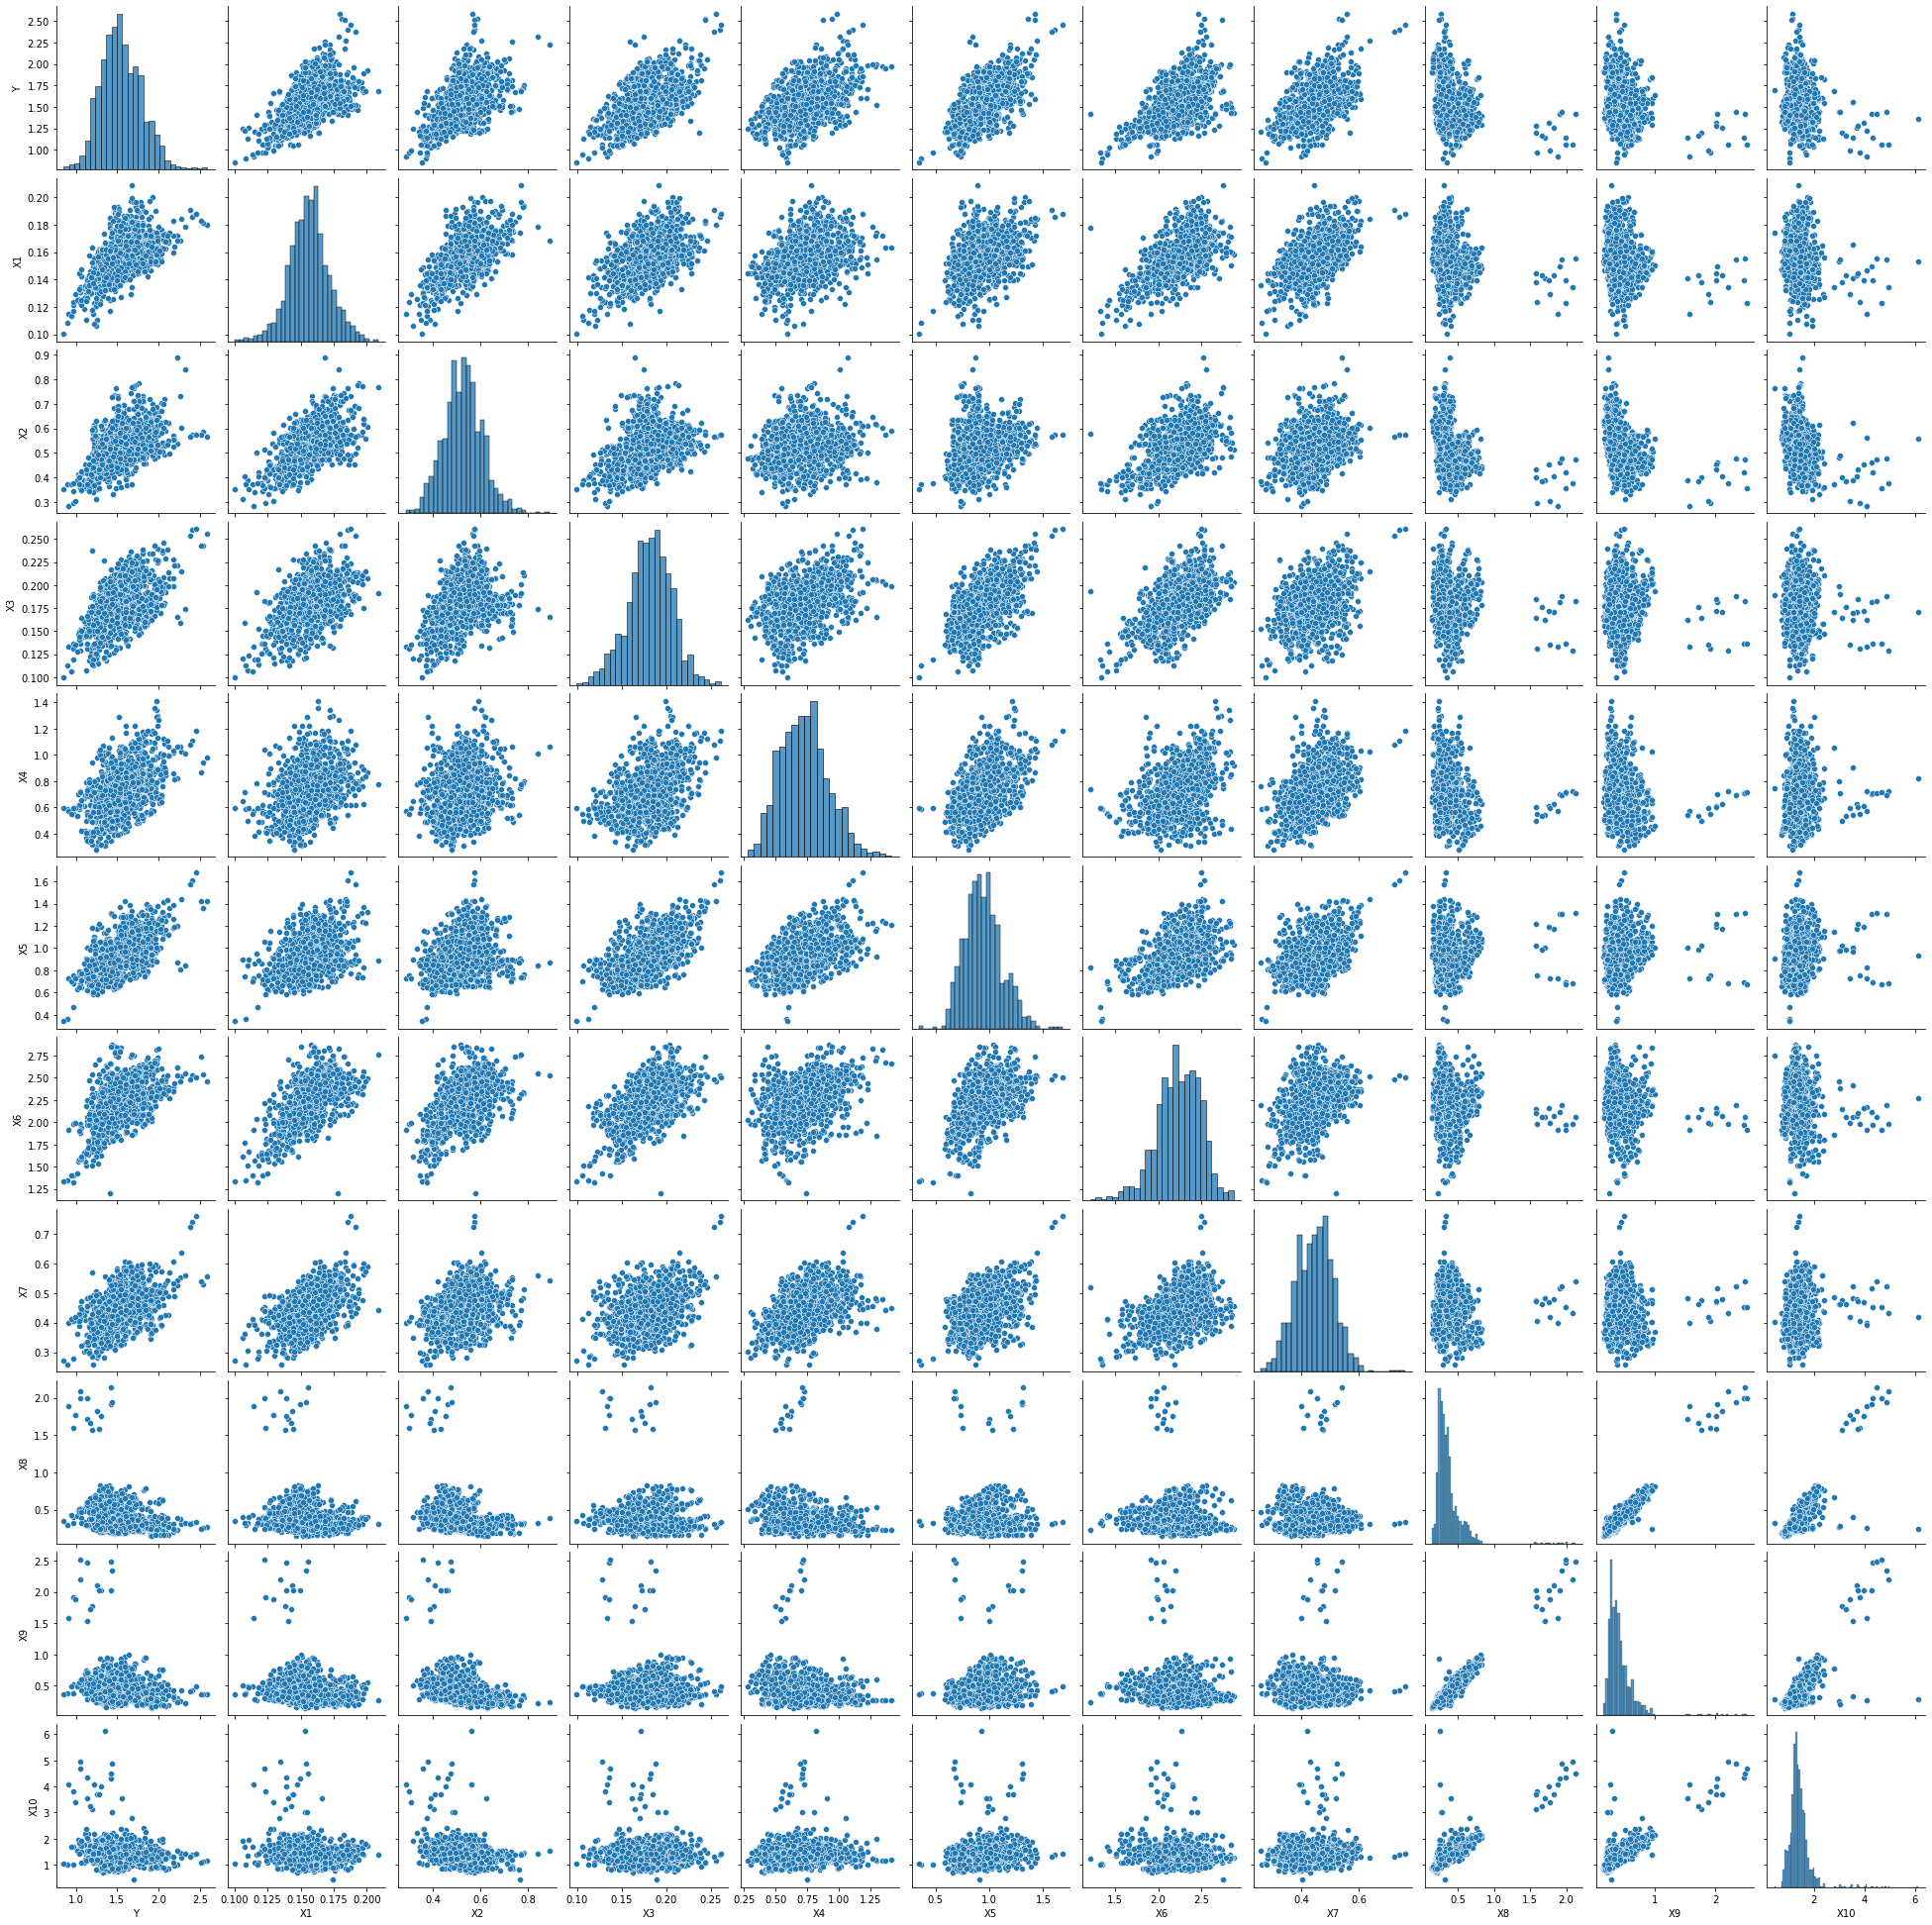

In [11]:
# Produce a pairplot from Seaborn library.
# Remark: This may take some time when p is large.
sns.pairplot(df);

Genotype
Control    570
Ts65Dn     507
Name: Genotype, dtype: int64


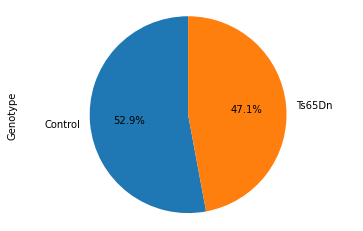

In [12]:
# Show the counts of data for qualitative variable Genotype.
#print(df['Gender'].value_counts())
print('Genotype')
print(df['Genotype'].value_counts())
df['Genotype'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');
# Type the code to show the counts for other qualitative variables. (Treatment / Behavior)

Treatment
Memantine    570
Saline       507
Name: Treatment, dtype: int64


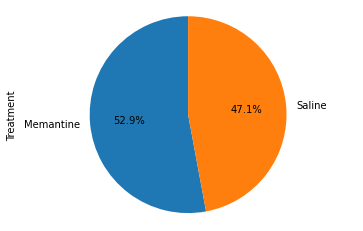

In [13]:
print('Treatment')
print(df['Treatment'].value_counts())
df['Treatment'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');

Behavior
S/C    552
C/S    525
Name: Behavior, dtype: int64


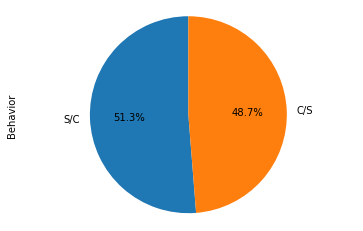

In [14]:
print('Behavior')
print(df['Behavior'].value_counts())
df['Behavior'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');

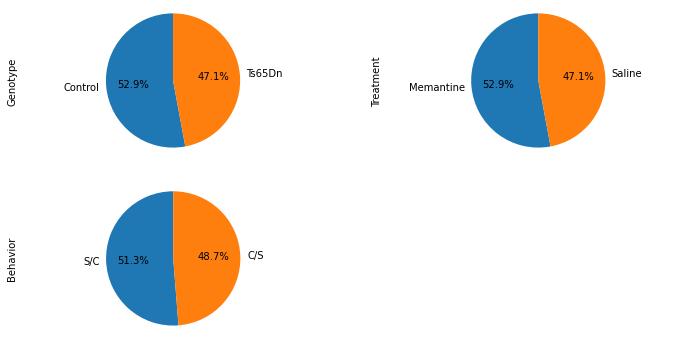

In [15]:
# Alternatively, we can create subplots of pie charts.

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(221)
df['Genotype'].value_counts().plot(kind='pie',autopct='%.1f%%', startangle=90)
plt.axis('equal')
ax2 = fig.add_subplot(222)
df['Treatment'].value_counts().plot(kind='pie',autopct='%.1f%%', startangle=90)
plt.axis('equal')
ax2 = fig.add_subplot(223)
df['Behavior'].value_counts().plot(kind='pie',autopct='%.1f%%', startangle=90)
plt.axis('equal');

In [16]:
# To code qualitative variables into dummy variables, one option is to use the get_dummies() function in the pandas library.

#dm = pd.get_dummies(df['Gender'])
#dm.tail()
dm_genotype = pd.get_dummies(df['Genotype'])
print(dm_genotype.tail())
print()
print(dm_genotype.dtypes)

      Control  Ts65Dn
1072        0       1
1073        0       1
1074        1       0
1075        1       0
1076        0       1

Control    uint8
Ts65Dn     uint8
dtype: object


In [17]:
dm_treatment = pd.get_dummies(df['Treatment'])
dm_treatment.tail()

,Memantine,Saline
1072,0,1
1073,1,0
1074,1,0
1075,1,0
1076,0,1


In [18]:
dm_behavior = pd.get_dummies(df['Behavior'])
dm_behavior.tail()

,C/S,S/C
1072,0,1
1073,1,0
1074,1,0
1075,1,0
1076,0,1


In [19]:
print(dm_genotype.dtypes)
print(dm_treatment.dtypes)
print(dm_behavior.dtypes)


Control    uint8
Ts65Dn     uint8
dtype: object
Memantine    uint8
Saline       uint8
dtype: object
C/S    uint8
S/C    uint8
dtype: object


In [20]:
# Convert 'uint8' to more common data type 'int64' for convenience later.

#dm['Female'] = np.int64(dm['Female'])
#dm.dtypes
dm_genotype['Control'] = np.int64(dm_genotype['Control'])
dm_genotype['Ts65Dn'] = np.int64(dm_genotype['Ts65Dn'])
dm_treatment['Memantine'] = np.int64(dm_treatment['Memantine'])
dm_treatment['Saline'] = np.int64(dm_treatment['Saline'])
dm_behavior['C/S'] = np.int64(dm_behavior['C/S'])
dm_behavior['S/C'] = np.int64(dm_behavior['S/C'])
print(dm_genotype.dtypes)
print(dm_treatment.dtypes)
print(dm_behavior.dtypes)

Control    int64
Ts65Dn     int64
dtype: object
Memantine    int64
Saline       int64
dtype: object
C/S    int64
S/C    int64
dtype: object


In [21]:
# Concatenate data set with dummy variables created.

#df2 = pd.concat([df, dm], axis=1)
#df2.tail()
df2 = pd.concat([df, dm_genotype, dm_treatment, dm_behavior], axis=1)
df2 = df2.rename(columns={"C/S": "CS", "S/C": "SC"})
df2.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior,Control,Ts65Dn,Memantine,Saline,CS,SC
1072,1.646627,0.140528,0.472118,0.164800,0.680359,0.723301,2.221932,0.459547,0.271043,0.324592,1.244453,Ts65Dn,Saline,S/C,0,1,0,1,0,1
1073,1.184260,0.141690,0.411090,0.171222,0.347869,0.666824,2.229500,0.400094,0.373307,0.418401,1.187314,Ts65Dn,Memantine,C/S,0,1,1,0,1,0
1074,1.603484,0.164838,0.539241,0.182344,0.827651,0.844376,2.430857,0.441829,0.419732,0.508725,1.430067,Control,Memantine,C/S,1,0,1,0,1,0
1075,0.971589,0.117226,0.374955,0.119494,0.596916,0.471171,1.321953,0.277665,0.317181,0.373648,1.020024,Control,Memantine,C/S,1,0,1,0,1,0
1076,1.437343,0.152001,0.600355,0.179621,0.500929,0.787907,2.052253,0.394140,0.216144,0.252390,0.848115,Ts65Dn,Saline,S/C,0,1,0,1,0,1


#### Now let's build the (full) MLR model.

In Statsmodels, we can input the formula in the format "response variable ~ predictor 1 + predictor 2 +...+ predictor p".  
Note that the variable names must agree with the column names (case sensitive) in the pandas DataFrame.

Task #4: Build a MLR model for _sales_ using all the predictors.  

In [22]:
# Split data set into 75:25.
#from sklearn.model_selection import train_test_split
#dftrain, dftest = train_test_split(df, test_size=0.25, random_state=12345)
### Admission number = 7414388. Use last 4 digit = 4388
dftrain, dftest = train_test_split(df2, test_size=0.25, random_state=4388)
# If you want to confirm ratio splitted:
#print( len(dftrain)/len(df) )
#print( len(dftest)/len(df) )
print(len(dftrain)/len(df2))
print(len(dftest)/len(df2))
print('No in Train Set ' + str(len(dftrain)))
print('No in Test Set ' + str(len(dftest)))

0.7493036211699164
0.25069637883008355
No in Train Set 807
No in Test Set 270


In [23]:
# Build a full MLR model for sales using all the predictors.
# Type your code here:
mlr1 = ols("Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + Genotype + Treatment + Behavior", dftrain).fit()
print(mlr1.summary())
print('\nMSE =', mlr1.mse_resid)

# Predict y for testing data
ypred1 = mlr1.predict(dftest)

# Compute and print Rsq for testing data
print('\nFor Checking Testing Data')
print('Rsq =', metrics.r2_score(dftest.Y, ypred1))

# Compute and print MSPE for testing data
print('MSPE =', metrics.mean_squared_error(dftest.Y, ypred1))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          6.04e-190
Time:                        15:46:42   Log-Likelihood:                 427.03
No. Observations:                 807   AIC:                            -826.1
Df Residuals:                     793   BIC:                            -760.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0691    

In [24]:
# Double check model without base. (Genotype already split using dummy variables)
# Type your code here:
mlr1_1 = ols("Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + Control + Ts65Dn + Memantine + Saline + CS + SC", dftrain).fit()
print(mlr1_1.summary())
print('\nMSE =', mlr1_1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          6.04e-190
Time:                        15:46:42   Log-Likelihood:                 427.03
No. Observations:                 807   AIC:                            -826.1
Df Residuals:                     793   BIC:                            -760.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0275      0.027     -1.014      0.3

In [25]:
# Backward Operator.
# Type your code here:
mlr2 = ols("Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + Genotype + Treatment + Behavior + (Treatment*Behavior) + (Genotype*Treatment) + (Genotype*Behavior)", dftrain).fit()
print(mlr2.summary())
print('\nMSE =', mlr2.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     126.2
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          7.09e-205
Time:                        15:46:42   Log-Likelihood:                 469.92
No. Observations:                 807   AIC:                            -905.8
Df Residuals:                     790   BIC:                            -826.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [26]:
# Backward Operator.
# Type your code here:
#mlr4 = ols("y ~ x2 + x5 + x6 + x7 + x8", df).fit()
#print(mlr4.summary())
#print('\nMSE =', mlr4.mse_resid)

In [27]:
# First create a dataframe for the new observation.  

#x0 = pd.DataFrame(dict({'TV':[100],'radio':[10],'newspaper':[50]}))
#x0
###x1 = pd.DataFrame(dict({'age':[20],'dist':[450],'shops':[4], 'lat':[24.95], 'long':[121.52]}))
###print('Data to Predict x1 =')
###print(x1)
###x2 = pd.DataFrame(dict({'age':[20],'dist':[450],'shops':[4]}))
###print('Data to Predict x2 =')
###print(x2)

# For point prediction, type: modelname.predict(x0)
# For point and interval prediction, type: modelname.get_prediction(x0).summary_frame()
###mlr1.predict(x1)
###print('\nPrediction Value MLR1')
###print(mlr1.get_prediction(x1).summary_frame())
###mlr2.predict(x1)
###print('\nPrediction Value MLR2')
###print(mlr2.get_prediction(x2).summary_frame())

# Step 3: Check the Assumptions for OLS

- Normality
- Independence
- Homoscedasticity

In [28]:
# To produce residual plots, we have to extract the residuals first. Type: residname = modelname.resid
mlrchkols = mlr2
residname = mlrchkols.resid

Normality

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

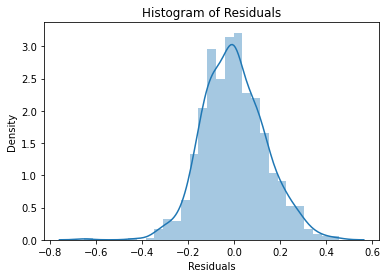

In [29]:
# Plot a histogram of the residuals to visually check normality.
# Type: sns.distplot(residname);  
# Add in titles and axes labels if you like. For example:
# plt.title('Histogram of Residuals')
# plt.ylabel('Density')
# plt.xlabel('Residuals');

sns.distplot(residname)
plt.title('Histogram of Residuals')
plt.ylabel('Density')
plt.xlabel('Residuals')

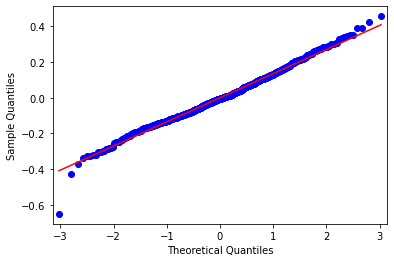

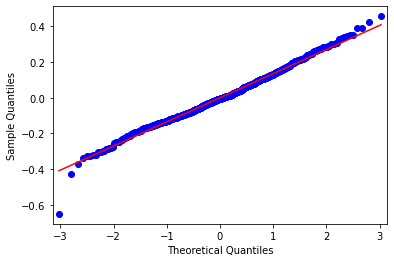

In [30]:
# To produce normal probability plot, type: sm.qqplot(residname, line='s')
sm.qqplot(residname, line='s')

In [31]:
# To perform the Jarque-Bera test on residuals, type: sm.stats.jarque_bera(residname)
# The function returns: JB test statistic, p-value, estimated skewness, estimated kurtosis
print('Jarque-Bera Test')
print(sm.stats.jarque_bera(residname))
# If P Value less than 0.05, we can reject H0. 
# We determine that the residuals DO NOT follow a normal distribution.
# Skewness within -2 and 2 (in normal distribution)
# Kurtosis within the range of -2 and 2, (in normal distribution)
# Residual Data not normally distributed.

print('\nOmnibus Test')
# To perform the Omnibus test on residuals, type: sm.stats.omni_normtest(residname)
print(sm.stats.omni_normtest(residname))

print('\nShapiro-Wilk Normality Test')
# Conduct Shapiro-Wilk normality test. The function returns test statistics and P-value.
#from scipy.stats import shapiro
#shapiro(residname)
print(shapiro(residname))

print('\nAnderson-Darling Test')
# Two ways to to conduct Anderson-Darling normality test
# One uses the scipy library, and one uses the statsmodel library
# scipy: returns test statistic and critical values. Reject H0 if test statistic > critical value
# statsmodel: returns test statistics and P-value
print(anderson(residname))
print('\nAnderson-Darling Test P-Value')
print(sm.stats.normal_ad(residname))

Jarque-Bera Test
(15.405953888685287, 0.0004514811460988774, 0.1017118881470111, 3.6455915114184334)

Omnibus Test
NormaltestResult(statistic=10.664252908051452, pvalue=0.004833780264285868)

Shapiro-Wilk Normality Test
ShapiroResult(statistic=0.9928687214851379, pvalue=0.000660170684568584)

Anderson-Darling Test
AndersonResult(statistic=1.2760031884479304, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Anderson-Darling Test P-Value
(1.2760031884479304, 0.002560745660779472)


Homoscedasticity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


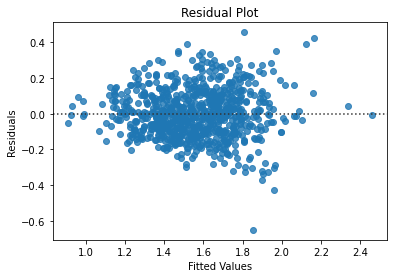

In [32]:
# Plot a scatterplot of the residuals vs. fitted values, to visually check for constant variance.
# Type: sns.residplot(modelname.fittedvalues,residname)
# Add in titles and axes labels if you like. For example:
# plt.title('Residual Plot')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals');
sns.residplot(mlrchkols.fittedvalues,residname)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

In [33]:
# Perform the Breusch-Pagan test on residuals. Type: sm.stats.het_breuschpagan(residname, modelname.model.exog)
# The function returns: Lagrange multiplier statistic, p-value, F-value, F p-value
print('Breusch-Pagan Test - Output from Jupyter')
bpa, bpb, bpc, bpd = sm.stats.het_breuschpagan(residname, mlrchkols.model.exog)
print('Lagrange Multiplier Statistic: '+ str(bpa))
print('P-Value: '+ str(bpb))
print('F-Value: '+ str(bpc))
print('F P-Value: '+ str(bpd))
# H0 = Homoscedastic
# H1 = HeteroScedastic
# Reject H0 if P-Value < Alpha

Breusch-Pagan Test - Output from Jupyter
Lagrange Multiplier Statistic: 69.9351650299774
P-Value: 1.0243373575524843e-08
F-Value: 4.684864355922741
F P-Value: 4.0298009776430226e-09


Independence

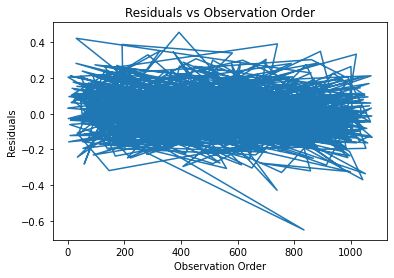

In [34]:
# Plot a line chart of the residuals, according to their observed order, to visually check independence.
# Type: plt.plot(residname);
# Add in titles and axes labels if you like. For example:
# plt.title('Residuals vs Observation Order')
# plt.xlabel('Observation Order')
# plt.ylabel('Residuals');
plt.plot(residname);
plt.title('Residuals vs Observation Order')
plt.xlabel('Observation Order')
plt.ylabel('Residuals');

In [35]:
# Perform the Durbin-Watson test on residuals. Type: sm.stats.durbin_watson(residname)
print('Durbin-Watson Test')
sm.stats.durbin_watson(residname)

Durbin-Watson Test


1.9472487686533961

## _Multicollinearity_

We can check for multicollinearity in the data set by:
- Visually inspect the correlation matrix for correlated predictors.
- Check the [condition number](https://en.wikipedia.org/wiki/Condition_number).  As a general rule of thumb, if the condition number is more than 30, the regression model may have multicolliearity problem. This is a matrix algebra method. In Statsmodel, summary output will automatically highlight multicollinearity issue if the condition number is too high.
- Check the [Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) (VIF) method. As a rule of thumb, we interpret VIF for each predictor as follows:

| VIF | Interpretation |
| ----- | ----- |
| VIF = 1 | Not correlated |
| 1<VIF<5 | Moderately correlated |
| VIF > 5 | Highly correlated |

In [36]:
print('Condition Number')
# To extract condition number, type: modelname.condition_number
print(mlrchkols.condition_number)

# Remove the intercept and recompute the condition number for the correlation matrix only.
#df.iloc[:,rows for predictors only].values
dataforcorrmatrix = df.iloc[:,0:8].values
print('\nCondition Number after removing Intercept')
print(np.linalg.cond(dataforcorrmatrix))
# Double check data correct or not.
print('\nDouble check data')
print(dataforcorrmatrix)
print('\nDouble check data')
print(df.head())

Condition Number
417.8328511922881

Condition Number after removing Intercept
295.69797957880945

Double check data
[[1.46429085 0.14700388 0.54116971 ... 0.73818077 1.98002587 0.37160512]
 [1.78157217 0.1461018  0.53753222 ... 0.83956186 2.13434278 0.48260309]
 [1.42571066 0.14984859 0.49037804 ... 0.85015141 2.11888248 0.46341702]
 ...
 [1.60348438 0.16483793 0.53924114 ... 0.84437558 2.43085686 0.4418293 ]
 [0.97158887 0.11722574 0.37495523 ... 0.47117106 1.32195297 0.27766504]
 [1.43734254 0.15200149 0.60035458 ... 0.78790706 2.05225343 0.39414015]]

Double check data
          Y        X1        X2        X3        X4        X5        X6  \
0  1.464291  0.147004  0.541170  0.182354  0.400464  0.738181  1.980026   
1  1.781572  0.146102  0.537532  0.202159  0.526507  0.839562  2.134343   
2  1.425711  0.149849  0.490378  0.174367  0.590303  0.850151  2.118882   
3  1.565796  0.144120  0.587164  0.199001  0.733511  1.300077  2.108993   
4  1.054776  0.134505  0.375166  0.128599  0.7

In [37]:
# To compute VIF for each predictor, import function from library first:
#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#print(modelname.model.exog_names[1], vif(modelname.model.exog,1))
print('VIF of Individual Predictors - Output from Jupyter')
for i in range(16):
    predictor = mlrchkols.model.exog_names[i+1]
    Vif = vif(mlrchkols.model.exog,i+1)
    print(predictor,Vif)

VIF of Individual Predictors - Output from Jupyter
Genotype[T.Ts65Dn] 3.306407488217091
Treatment[T.Saline] 3.3775031578384844
Behavior[T.S/C] 5.105470121864825
Treatment[T.Saline]:Behavior[T.S/C] 3.982711193092985
Genotype[T.Ts65Dn]:Treatment[T.Saline] 2.993745540967285
Genotype[T.Ts65Dn]:Behavior[T.S/C] 3.8097450060339364
X1 3.2816601634548404
X2 2.77731333858255
X3 2.6573866318097665
X4 2.553744077262287
X5 2.773377499801604
X6 2.4050801352969096
X7 1.9574247667175784
X8 18.45899114103297
X9 18.02975347565943
X10 4.981756267408428


# PCA

In [38]:
# Create the standard scaler (i.e. change X to Z) object, and fit on training data, but selected columns only.
sclr = preprocessing.StandardScaler()
sclr.fit(dftrain[['X8','X9','X10']])

print('mean is', sclr.mean_)
print('sd is', sclr.scale_)

mean is [0.38378892 0.4330531  1.43399115]
sd is [0.22316863 0.25738983 0.45674317]


In [39]:
# Standardize columns Income, Limit and Rating in training data.
zdftrain = dftrain.copy()
zdftrain[['X8','X9','X10']] = sclr.transform(dftrain[['X8','X9','X10']])
zdftrain.tail()
# Standardize by (Value - Mean) divide by SD.

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior,Control,Ts65Dn,Memantine,Saline,CS,SC
985,1.490795,0.142098,0.439516,0.176449,0.506597,0.897195,2.055851,0.423452,0.832121,1.109385,0.479482,Ts65Dn,Memantine,C/S,0,1,1,0,1,0
683,1.455702,0.153902,0.568547,0.191717,0.788558,0.762425,2.071909,0.368427,-0.464659,-0.543604,-0.155584,Control,Saline,S/C,1,0,0,1,0,1
32,1.707850,0.159354,0.588555,0.189582,0.659295,0.868966,1.880411,0.377843,-0.303038,-0.275703,0.047952,Ts65Dn,Memantine,S/C,0,1,1,0,0,1
871,1.721678,0.161282,0.502088,0.223425,0.606245,0.944591,2.304066,0.490666,0.826854,0.349165,0.420490,Control,Memantine,C/S,1,0,1,0,1,0
912,1.560480,0.165721,0.624017,0.169869,0.902652,0.971616,2.420306,0.520961,0.075142,-0.413635,4.610437,Control,Memantine,S/C,1,0,1,0,0,1


In [40]:
# Standardize columns Income, Limit and Rating in test data, using mean and SD from fitting scaler on training data.
zdftest = dftest.copy()
zdftest[['X8','X9','X10']] = sclr.transform(dftest[['X8','X9','X10']])
zdftest.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior,Control,Ts65Dn,Memantine,Saline,CS,SC
995,1.562261,0.158131,0.548309,0.189137,0.643254,0.954211,2.157522,0.377941,-0.698697,-0.445966,-0.930777,Ts65Dn,Saline,S/C,0,1,0,1,0,1
947,1.597510,0.156293,0.551867,0.175262,0.662738,0.917605,2.530330,0.502272,-0.054109,-0.791324,0.280491,Control,Saline,S/C,1,0,0,1,0,1
445,1.414081,0.149852,0.430298,0.171605,0.848640,0.786138,2.010525,0.400281,-0.776224,-0.516311,-0.261484,Ts65Dn,Memantine,S/C,0,1,1,0,0,1
287,1.812500,0.169265,0.472755,0.198584,0.864695,0.896382,2.311427,0.508081,-0.399199,-0.086196,0.200487,Ts65Dn,Saline,S/C,0,1,0,1,0,1
714,1.460078,0.192837,0.569787,0.211515,0.870470,1.290025,2.450739,0.450431,-0.519803,-0.521495,0.275298,Ts65Dn,Memantine,S/C,0,1,1,0,0,1


In [41]:
# Have you imported the PCA function from scikit-learn library?

# Create the PCA instance with 3 components, then 
# fit standardized training data of columns Income, Limit & Rating to PCA.
pca1 = PCA(n_components=3)
pca1.fit(zdftrain[['X8','X9','X10']])

# Extract principal components, and the corresponding proportion of variance.
print('Proportion of total variance:', pca1.explained_variance_ratio_)
print('\nPrincipal components are:\n', pca1.components_)

# Alternatively, display the principal components in a table form.
#pd.DataFrame(pca3.components_, columns=['Income','Limit','Rating'])

Proportion of total variance: [0.92500201 0.06184613 0.01315186]

Principal components are:
 [[ 0.58685197  0.58390143  0.56094909]
 [-0.35522945 -0.43689145  0.82640057]
 [-0.72761034  0.68424044  0.04897162]]


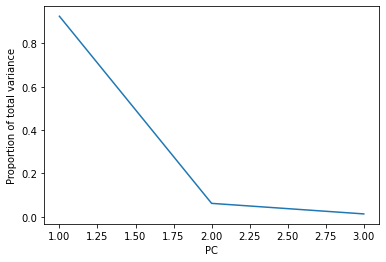

In [42]:
# Optional: Produce a scree plot to select the number of components to retain.
# Look for "elbow" in the scree plot.  Number of PCs = n that is just left of the elbow.
plt.plot([1,2,3],pca1.explained_variance_ratio_)
plt.xlabel('PC')
plt.ylabel('Proportion of total variance');

In [43]:
# Transform training data Z_Income, Z_Limit, Z_Rating to PC1, PC2, PC3 scores.
newX = pca1.transform(zdftrain[['X8','X9','X10']])

# Append PC1, PC2 & PC3 scores to (standardized) training data frame
zdftrain['pc1'] = newX[:,0]
#zdftrain['pc2'] = newX[:,1]
#zdftrain['pc3'] = newX[:,2]
zdftrain.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Genotype,Treatment,Behavior,Control,Ts65Dn,Memantine,Saline,CS,SC,pc1
985,1.490795,0.142098,0.439516,0.176449,0.506597,0.897195,2.055851,0.423452,0.832121,1.109385,...,Ts65Dn,Memantine,C/S,0,1,1,0,1,0,1.405068
683,1.455702,0.153902,0.568547,0.191717,0.788558,0.762425,2.071909,0.368427,-0.464659,-0.543604,...,Control,Saline,S/C,1,0,0,1,0,1,-0.677372
32,1.707850,0.159354,0.588555,0.189582,0.659295,0.868966,1.880411,0.377843,-0.303038,-0.275703,...,Ts65Dn,Memantine,S/C,0,1,1,0,0,1,-0.311923
871,1.721678,0.161282,0.502088,0.223425,0.606245,0.944591,2.304066,0.490666,0.826854,0.349165,...,Control,Memantine,C/S,1,0,1,0,1,0,0.924993
912,1.560480,0.165721,0.624017,0.169869,0.902652,0.971616,2.420306,0.520961,0.075142,-0.413635,...,Control,Memantine,S/C,1,0,1,0,0,1,2.388795


In [44]:
# Transform testing data Z_Income, Z_Limit, Z_Rating to PC1, PC2, PC3 scores.
del newX
newX = pca1.transform(zdftest[['X8','X9','X10']])

# Append PC1, PC2 & PC3 scores to (standardized) testing data frame
zdftest['pc1'] = newX[:,0]
#zdftest['pc2'] = newX[:,1]
#zdftest['pc3'] = newX[:,2]
zdftest.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Genotype,Treatment,Behavior,Control,Ts65Dn,Memantine,Saline,CS,SC,pc1
995,1.562261,0.158131,0.548309,0.189137,0.643254,0.954211,2.157522,0.377941,-0.698697,-0.445966,...,Ts65Dn,Saline,S/C,0,1,0,1,0,1,-1.192551
947,1.597510,0.156293,0.551867,0.175262,0.662738,0.917605,2.530330,0.502272,-0.054109,-0.791324,...,Control,Saline,S/C,1,0,0,1,0,1,-0.336468
445,1.414081,0.149852,0.430298,0.171605,0.848640,0.786138,2.010525,0.400281,-0.776224,-0.516311,...,Ts65Dn,Memantine,S/C,0,1,1,0,0,1,-0.903683
287,1.812500,0.169265,0.472755,0.198584,0.864695,0.896382,2.311427,0.508081,-0.399199,-0.086196,...,Ts65Dn,Saline,S/C,0,1,0,1,0,1,-0.172138
714,1.460078,0.192837,0.569787,0.211515,0.870470,1.290025,2.450739,0.450431,-0.519803,-0.521495,...,Ts65Dn,Memantine,S/C,0,1,1,0,0,1,-0.455121


In [45]:
# mlr2:
pcr1 = ols("Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + pc1 + Genotype + Treatment + Behavior + (Treatment*Behavior) + (Genotype*Treatment) + (Genotype*Behavior)", zdftrain).fit()
print(pcr1.summary())
print('\nMSE =', pcr1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          5.28e-205
Time:                        15:46:43   Log-Likelihood:                 465.12
No. Observations:                 807   AIC:                            -900.2
Df Residuals:                     792   BIC:                            -829.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [46]:
for i in range(14):
    predictor = pcr1.model.exog_names[i+1]
    Vif = vif(pcr1.model.exog,i+1)
    print(predictor,Vif)

Genotype[T.Ts65Dn] 3.2848667016994457
Treatment[T.Saline] 3.3772441305306202
Behavior[T.S/C] 4.818043606124566
Treatment[T.Saline]:Behavior[T.S/C] 3.966145385809001
Genotype[T.Ts65Dn]:Treatment[T.Saline] 2.9796121106585005
Genotype[T.Ts65Dn]:Behavior[T.S/C] 3.7963662883117983
X1 3.2263488147458212
X2 2.742917342025878
X3 2.5619444734976633
X4 2.458690741813041
X5 2.4917582896755555
X6 2.3191436743167526
X7 1.9498703834935445
pc1 1.4335485113498656


In [47]:
#Backward Selection:
mlr3 = ols("Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + pc1 + Genotype + Treatment + Behavior + (Treatment*Behavior) + (Genotype*Behavior)", zdftrain).fit()
print(mlr3.summary())
print('\nMSE =', mlr3.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          4.33e-206
Time:                        15:46:43   Log-Likelihood:                 465.08
No. Observations:                 807   AIC:                            -902.2
Df Residuals:                     793   BIC:                            -836.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [48]:
#Backward Selection:
mlr4 = ols("np.log(Y) ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + pc1 + Genotype + Treatment + Behavior + (Treatment*Behavior) + (Genotype*Behavior)", zdftrain).fit()
print(mlr4.summary())
print('\nMSE =', mlr4.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     161.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          9.21e-213
Time:                        15:46:43   Log-Likelihood:                 836.35
No. Observations:                 807   AIC:                            -1645.
Df Residuals:                     793   BIC:                            -1579.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


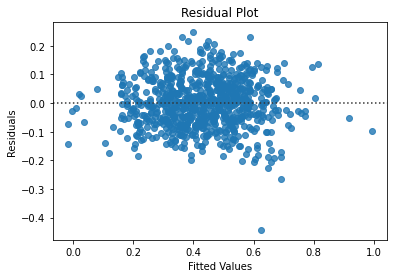

In [49]:
sns.residplot(mlr4.fittedvalues,mlr4.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

In [50]:
#Backward Selection:
mlr5 = ols("np.log(Y) ~ np.log(X1) + np.log(X2) + np.log(X3) + np.log(X4) + np.log(X5) + np.log(X6) + np.log(X7) + pc1 + Genotype + Treatment + Behavior + (Treatment*Behavior) + (Genotype*Behavior)", zdftrain).fit()
print(mlr5.summary())
print('\nMSE =', mlr5.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     160.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          2.76e-211
Time:                        15:46:43   Log-Likelihood:                 832.87
No. Observations:                 807   AIC:                            -1638.
Df Residuals:                     793   BIC:                            -1572.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


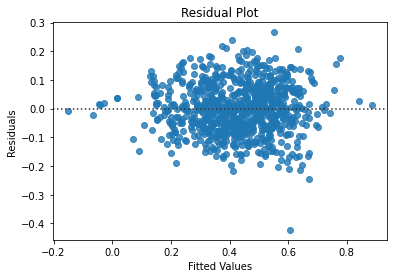

In [51]:
sns.residplot(mlr5.fittedvalues,mlr5.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

In [52]:
#For Testing only.:
#mlr6 = ols("np.log(Y) ~ np.log(X1) + np.log(X2) + np.log(X3) + np.log(X4) + np.log(X5) + np.log(X6) + np.log(X7) + np.log(pc1) + Genotype + Treatment + Behavior + (Treatment*Behavior) + (Genotype*Behavior)", zdftrain).fit()
#print(mlr6.summary())
#print('\nMSE =', mlr6.mse_resid)

# Find Outlier

In [53]:
#res = mlr2.resid
res5 = mlr5.resid
## if you want to locate the index of the outlier:
#res.idxmin()  or, res.idxmax() 
res5.idxmin() 

835

In [54]:
res5[res5.idxmin()]

-0.4227267656798859

In [55]:
zdftrain.loc[835]

Y              1.20059
X1            0.163569
X2            0.592381
X3            0.237054
X4            0.943383
X5             1.18292
X6             2.38372
X7            0.567817
X8           -0.535269
X9           -0.383244
X10          0.0925602
Genotype       Control
Treatment       Saline
Behavior           S/C
Control              1
Ts65Dn               0
Memantine            0
Saline               1
CS                   0
SC                   1
pc1          -0.485978
Name: 835, dtype: object

In [56]:
zdftrain.shape

(807, 21)

In [57]:
zdftrain2 = zdftrain.drop([835], axis=0)

In [58]:
zdftrain2.shape

(806, 21)

In [59]:
#Removed Outlier:
mlr5_1 = ols("np.log(Y) ~ np.log(X1) + np.log(X2) + np.log(X3) + np.log(X4) + np.log(X5) + np.log(X6) + np.log(X7) + pc1 + Genotype + Treatment + Behavior + (Treatment*Behavior) + (Genotype*Behavior)", zdftrain2).fit()
print(mlr5_1.summary())
print('\nMSE =', mlr5_1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     166.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          8.67e-216
Time:                        15:46:43   Log-Likelihood:                 843.73
No. Observations:                 806   AIC:                            -1659.
Df Residuals:                     792   BIC:                            -1594.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


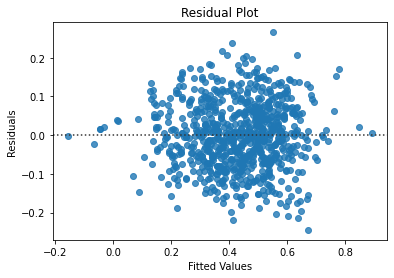

In [60]:
sns.residplot(mlr5_1.fittedvalues,mlr5_1.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

In [65]:
# Check performance of model on test data.

yhat = mlr5_1.predict(zdftest)   # Make predictions on test data
print('Rsq =', metrics.r2_score(zdftest.Y, yhat))   # Compute and print Rsq for test data
print('MSPE =', metrics.mean_squared_error(zdftest.Y, yhat))   # Compute and print MSPE for testing data

Rsq = -23.187268746028767
MSPE = 1.230047968465317


In [62]:
zdftest.Y

680    1.539101
400    1.698222
946    1.620966
111    1.633388
333    1.409780
         ...   
995    1.562261
947    1.597510
445    1.414081
287    1.812500
714    1.460078
Name: Y, Length: 270, dtype: float64

In [63]:
yhat

680    0.510352
400    0.648855
946    0.408548
111    0.481018
333    0.394863
         ...   
995    0.462377
947    0.409549
445    0.315347
287    0.449283
714    0.602023
Length: 270, dtype: float64

In [64]:
zdftrain2

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Genotype,Treatment,Behavior,Control,Ts65Dn,Memantine,Saline,CS,SC,pc1
540,1.484624,0.140656,0.430996,0.163804,0.520293,0.760234,1.957233,0.391691,0.008289,0.035175,...,Control,Memantine,C/S,1,0,1,0,1,0,0.223252
82,1.426410,0.154967,0.489607,0.167909,0.573262,0.814780,2.114460,0.437840,-0.035761,0.165608,...,Control,Saline,C/S,1,0,0,1,1,0,0.049090
844,1.506875,0.153306,0.506729,0.186951,0.691622,0.905354,2.449971,0.476009,-0.392592,-0.838158,...,Control,Saline,S/C,1,0,0,1,0,1,-0.707469
586,1.769879,0.162637,0.596536,0.203176,0.672455,1.007819,2.012511,0.373872,-0.209988,-0.278084,...,Ts65Dn,Memantine,S/C,0,1,1,0,0,1,-0.511697
318,1.349006,0.141932,0.422730,0.161720,0.839205,0.810875,1.833552,0.370808,-0.605463,-0.498310,...,Ts65Dn,Memantine,S/C,0,1,1,0,0,1,-0.649990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1.490795,0.142098,0.439516,0.176449,0.506597,0.897195,2.055851,0.423452,0.832121,1.109385,...,Ts65Dn,Memantine,C/S,0,1,1,0,1,0,1.405068
683,1.455702,0.153902,0.568547,0.191717,0.788558,0.762425,2.071909,0.368427,-0.464659,-0.543604,...,Control,Saline,S/C,1,0,0,1,0,1,-0.677372
32,1.707850,0.159354,0.588555,0.189582,0.659295,0.868966,1.880411,0.377843,-0.303038,-0.275703,...,Ts65Dn,Memantine,S/C,0,1,1,0,0,1,-0.311923
871,1.721678,0.161282,0.502088,0.223425,0.606245,0.944591,2.304066,0.490666,0.826854,0.349165,...,Control,Memantine,C/S,1,0,1,0,1,0,0.924993
